In [1]:
from lab4 import *

In [2]:
rating_csv = pd.read_csv('E:/dataset/ml-latest-small/ratings.csv')
movie_csv = pd.read_csv('E:/dataset/ml-latest-small/movies.csv')
overalltrend = OverallTrend(rating_csv, movie_csv)
overalltrend.data_clean()
overalltrend.get_users()
overalltrend.movie_average()
overalltrend.movie_genres()
movie_average = overalltrend.movie_average
ratings = overalltrend.ratings
users = overalltrend.users

2


C:\Users\JiaoFusen\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


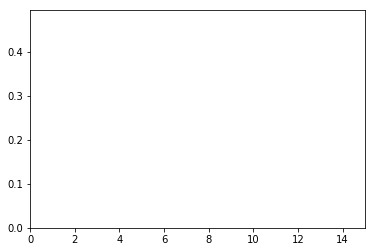

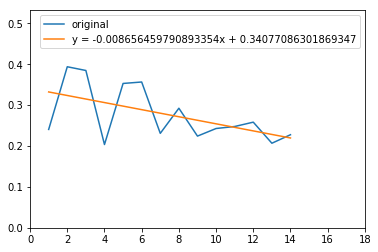

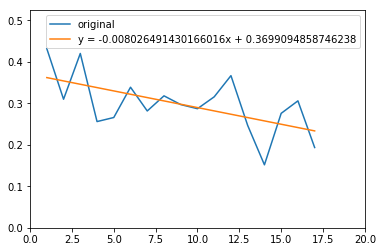

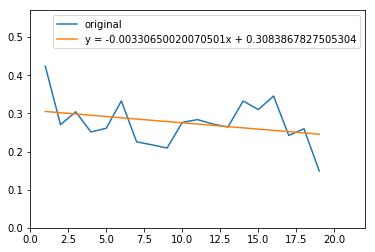

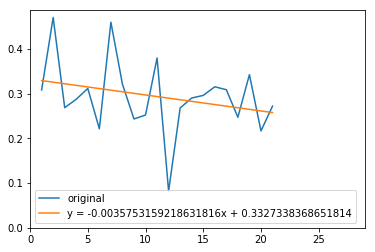

3


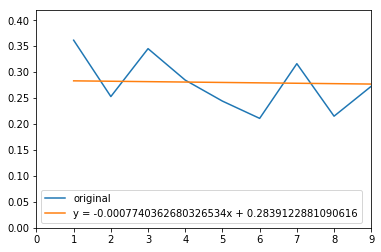

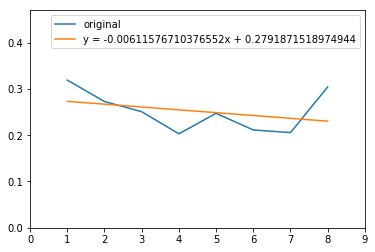

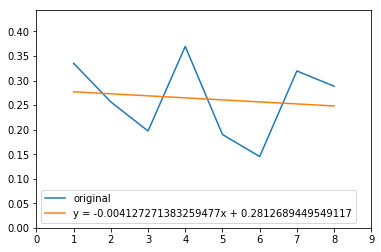

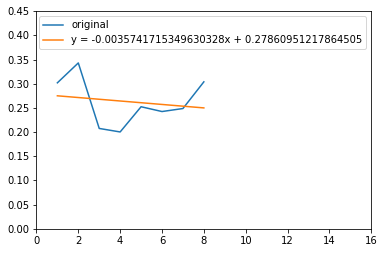

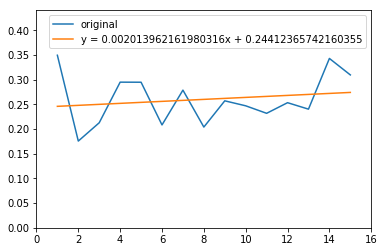

4


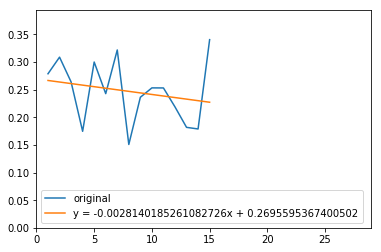

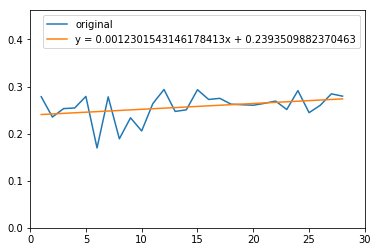

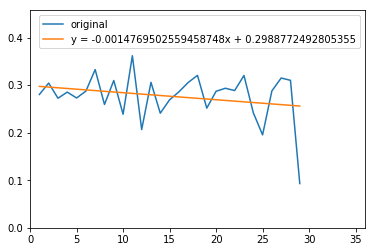

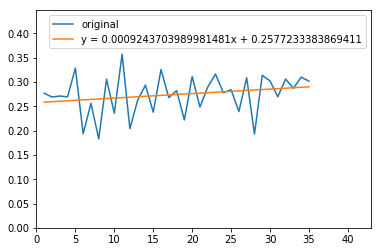

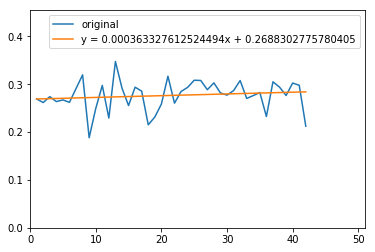

5


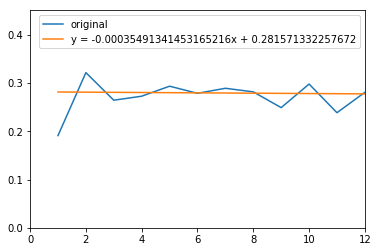

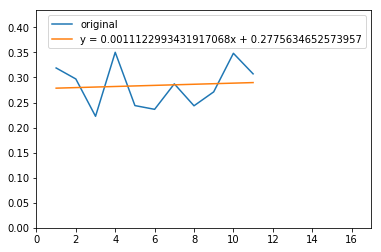

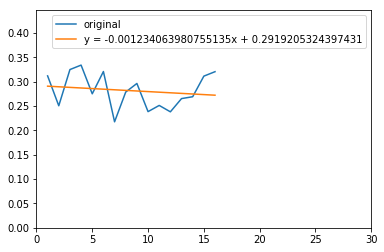

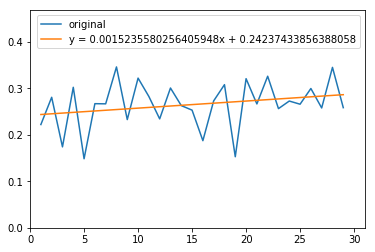

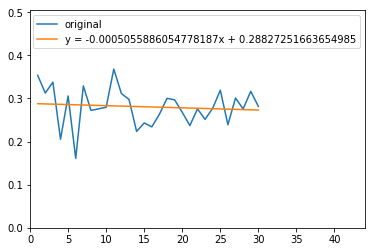

6


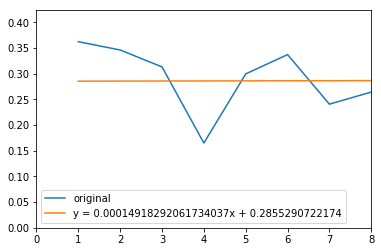

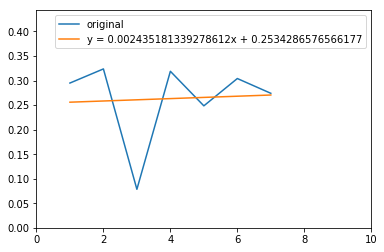

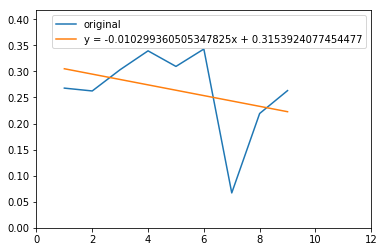

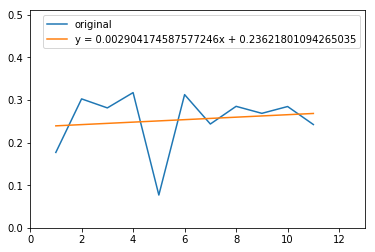

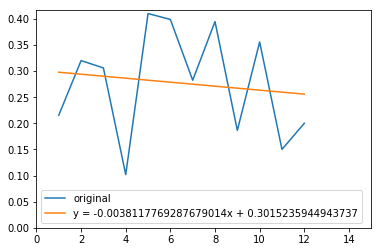

7


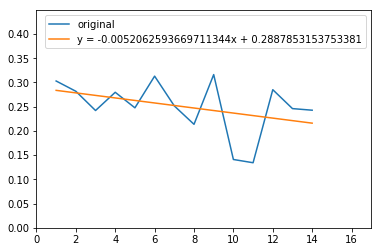

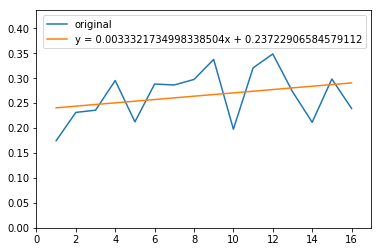

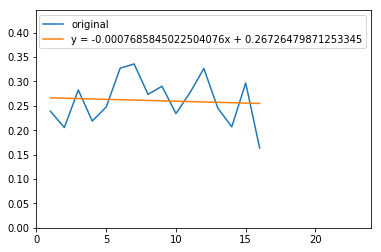

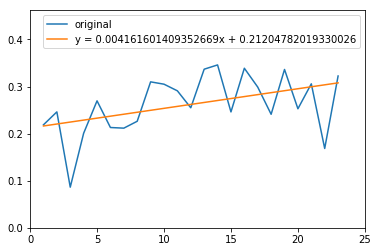

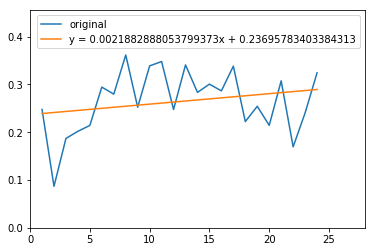

8


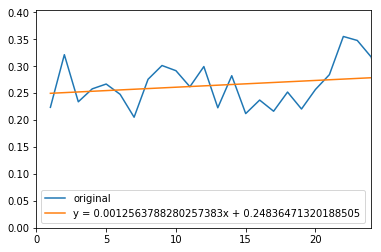

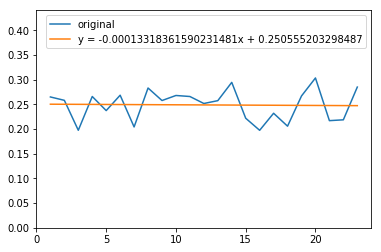

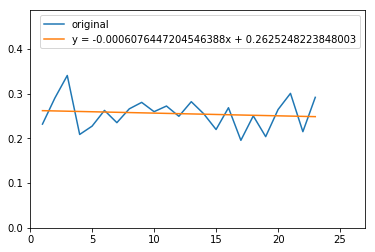

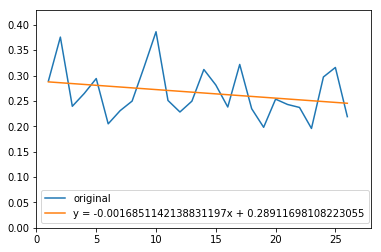

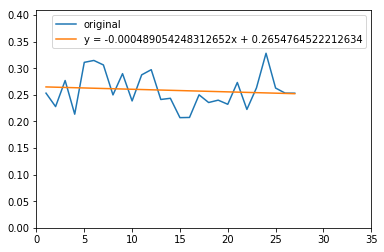

9


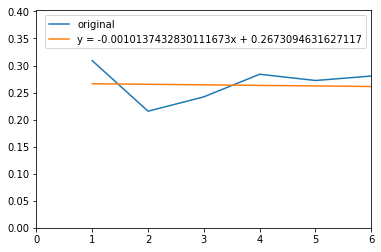

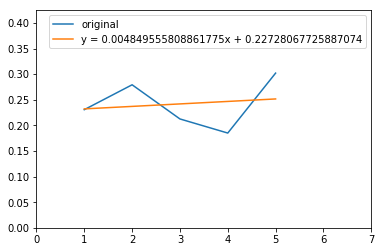

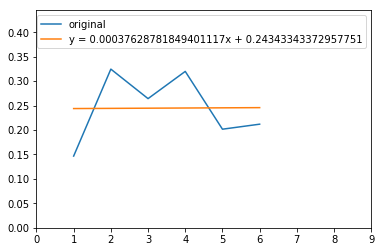

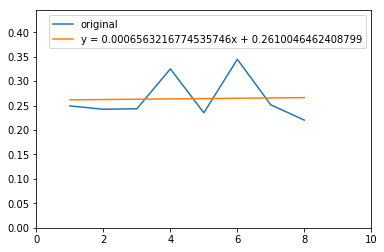

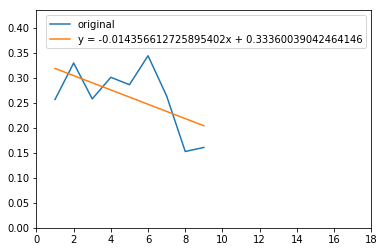

10


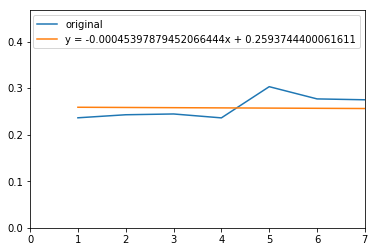

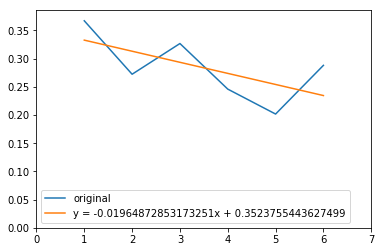

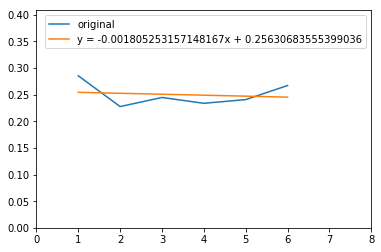

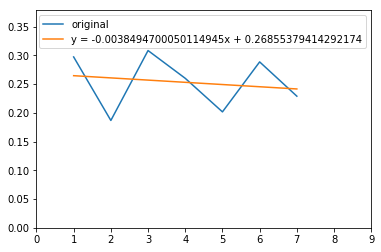

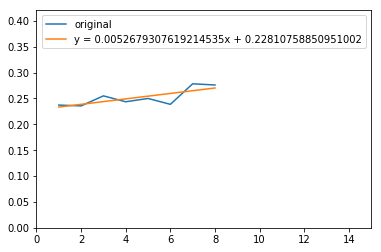

13


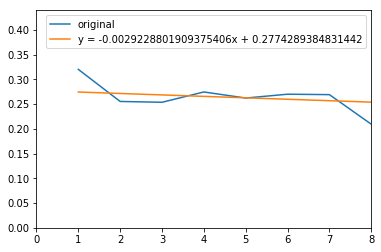

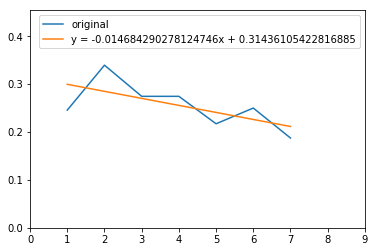

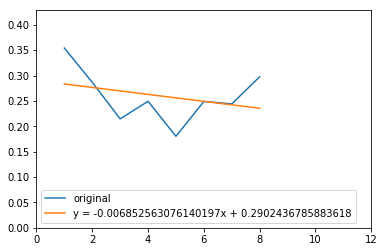

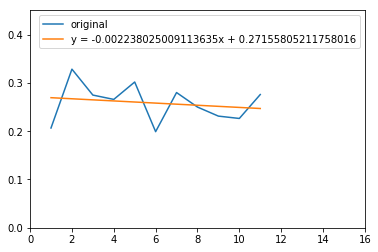

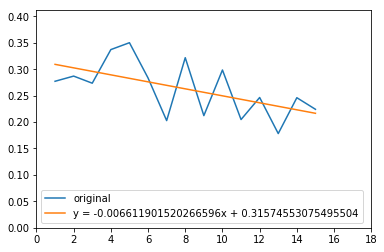

15


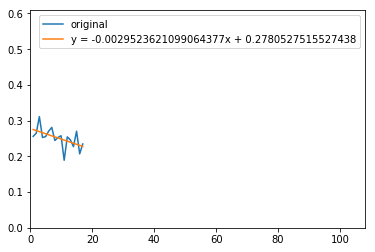

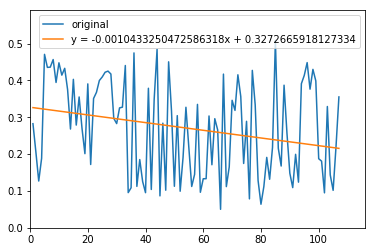

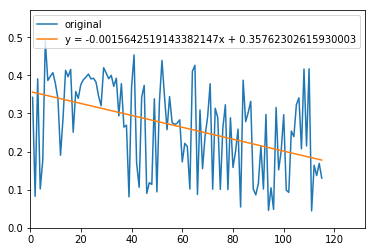

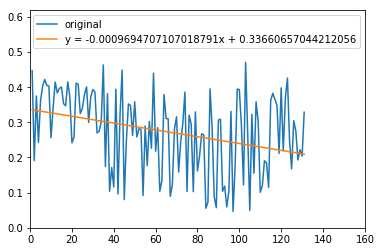

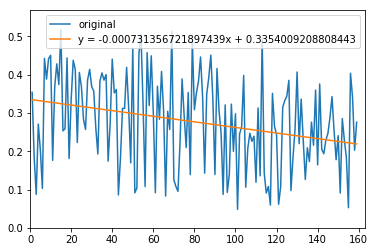

16


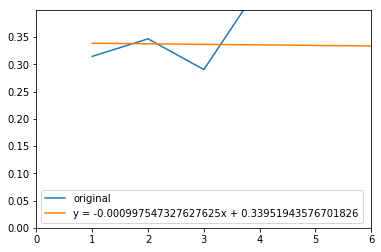

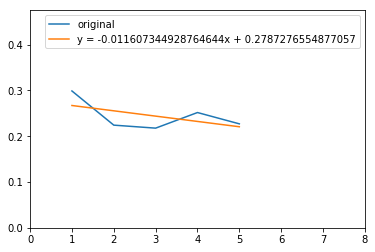

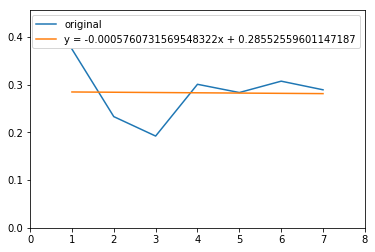

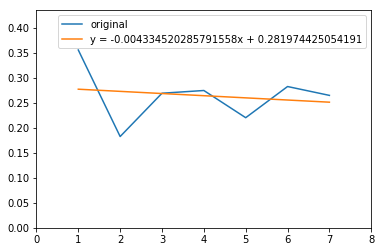

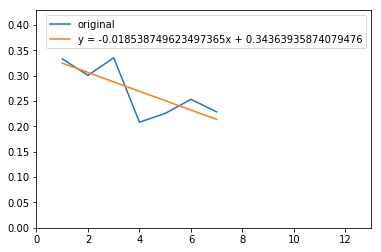

17


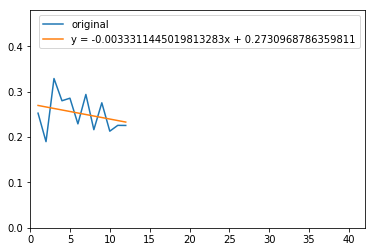

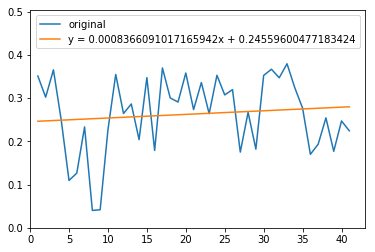

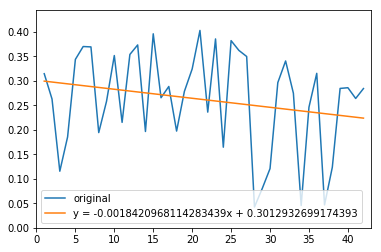

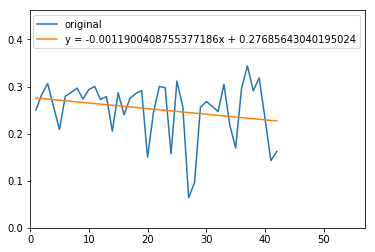

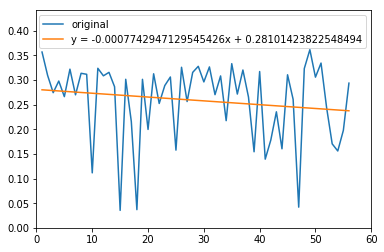

18


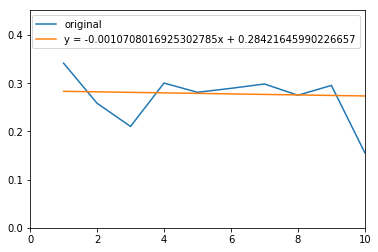

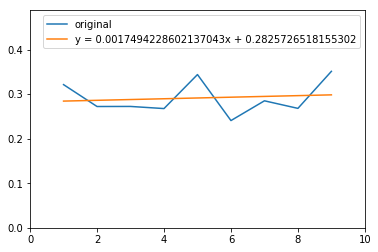

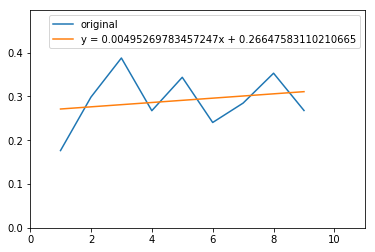

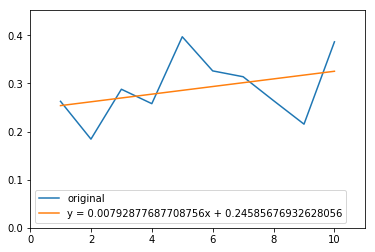

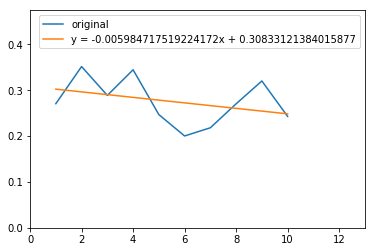

19


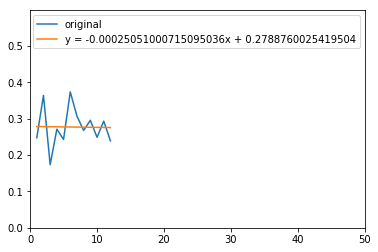

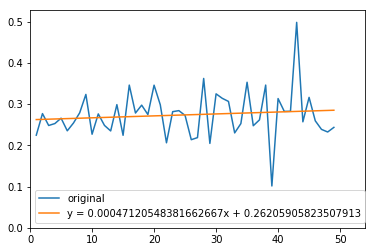

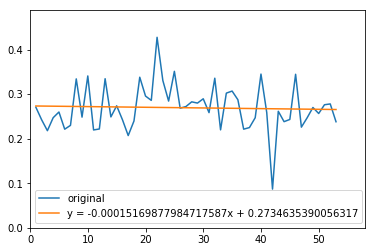

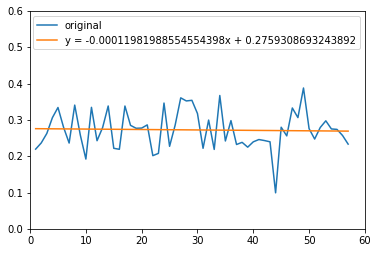

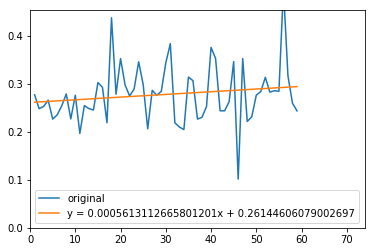

20


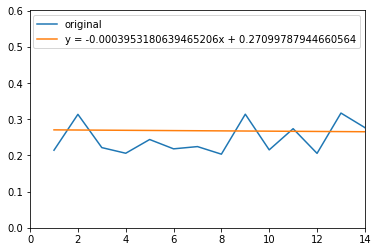

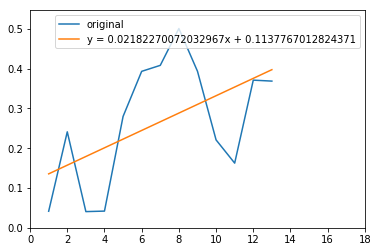

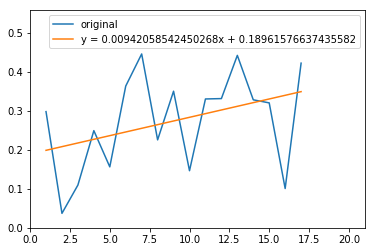

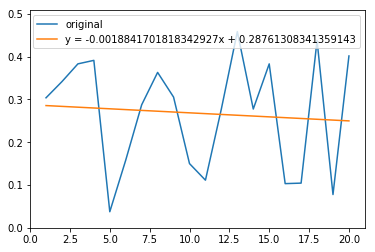

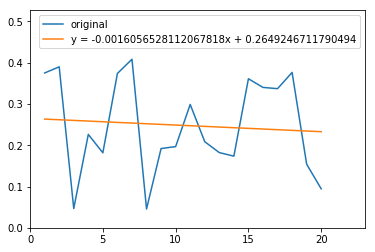

21


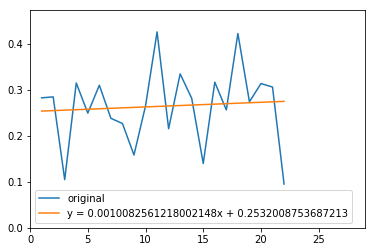

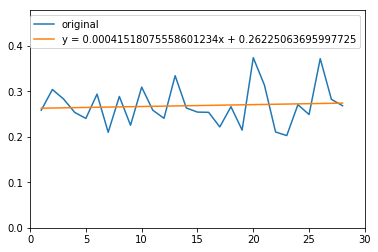

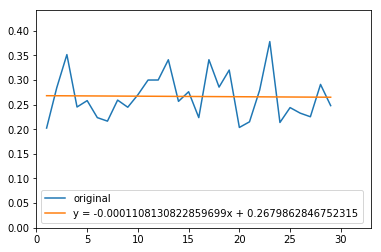

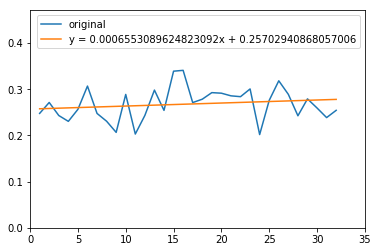

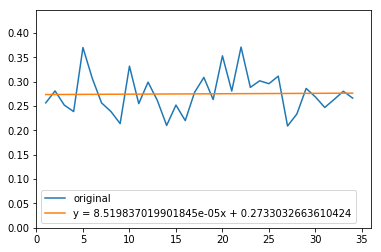

22


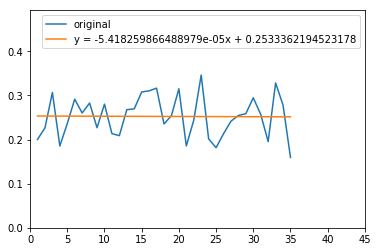

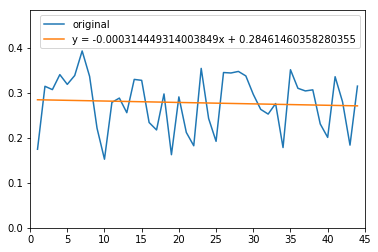

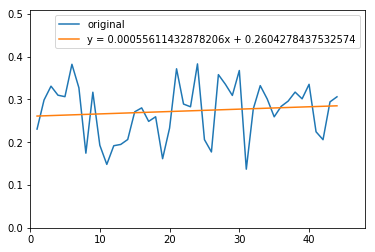

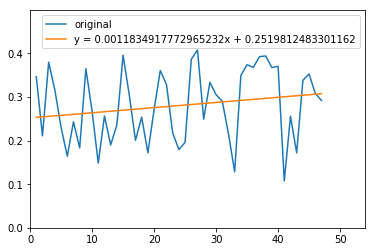

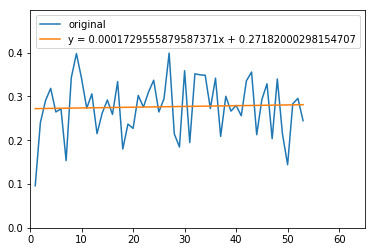

23


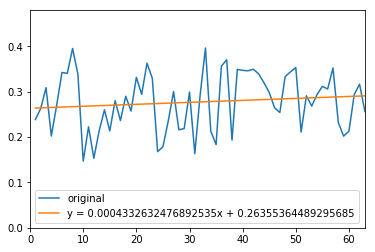

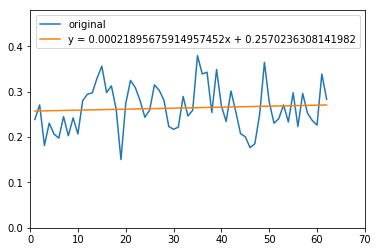

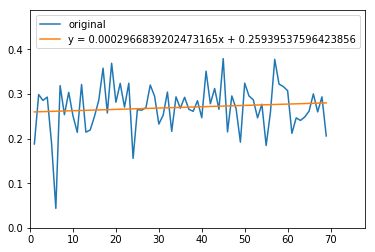

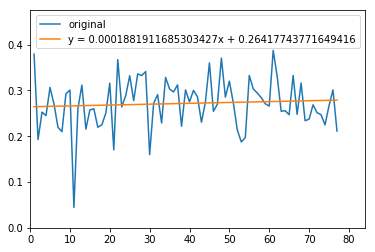

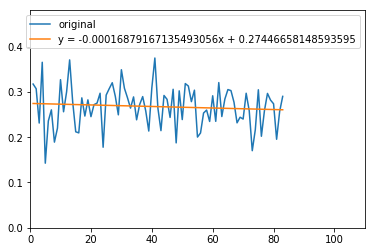

26


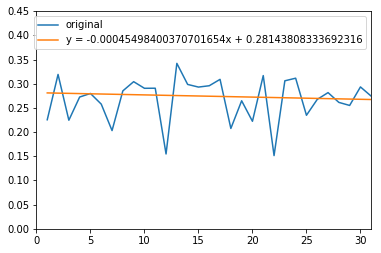

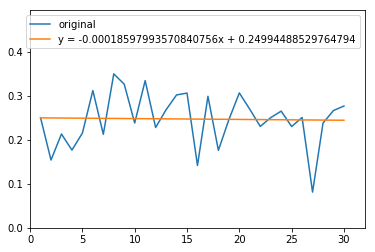

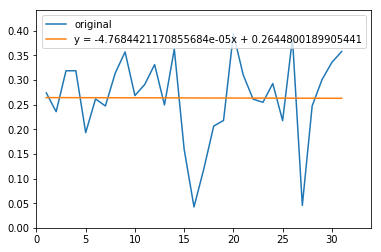

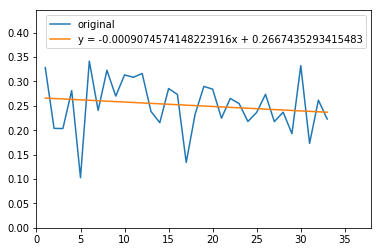

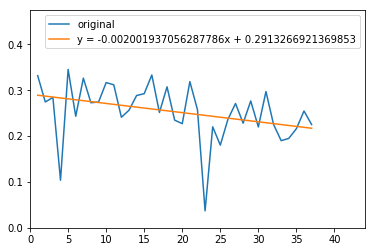

28


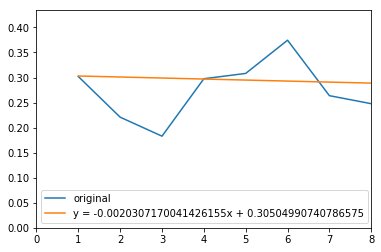

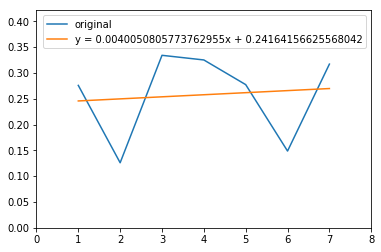

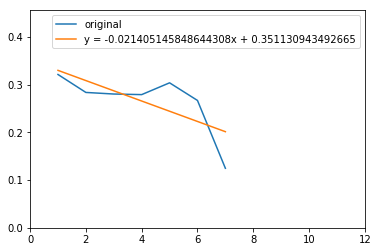

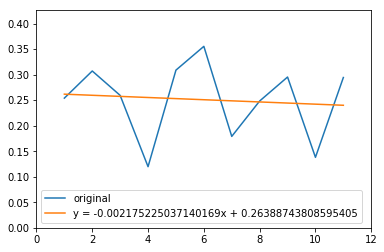

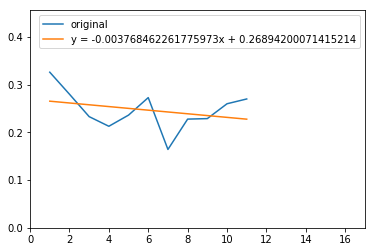

30


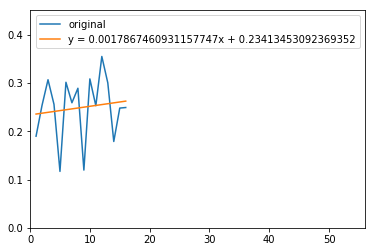

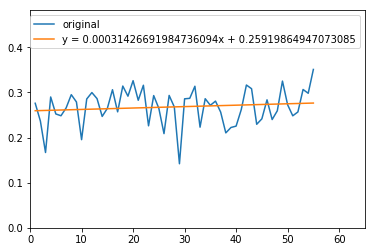

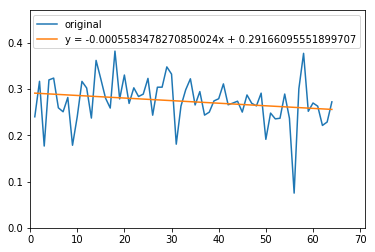

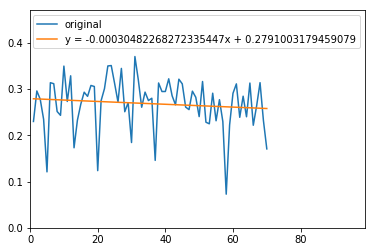

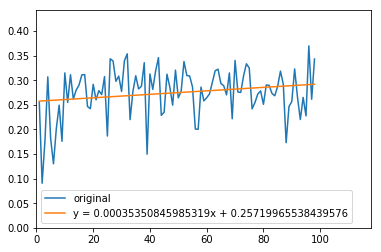

31


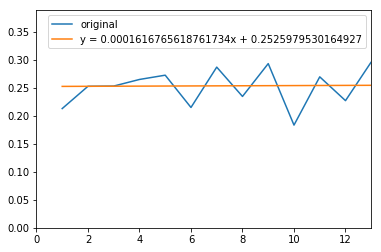

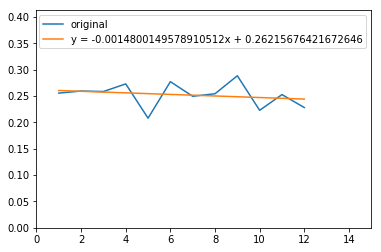

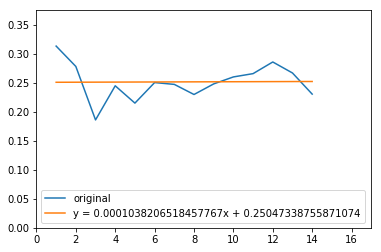

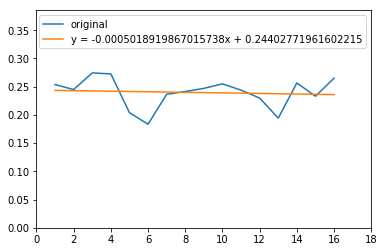

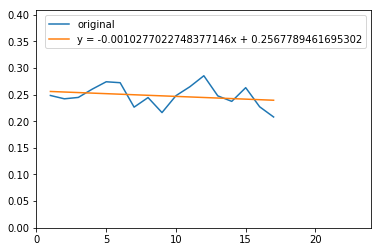

32


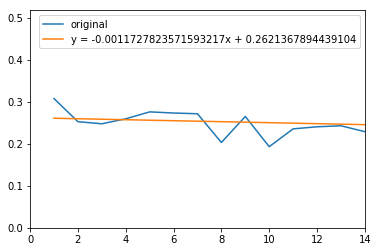

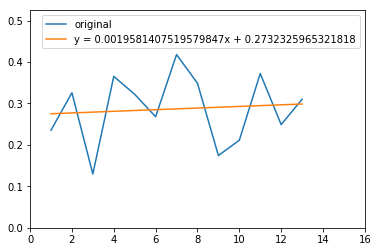

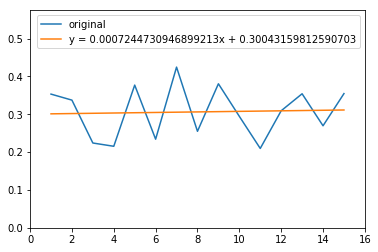

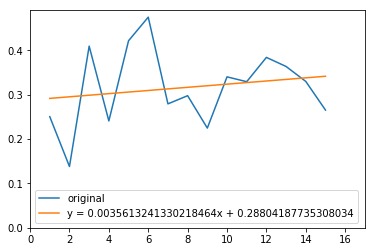

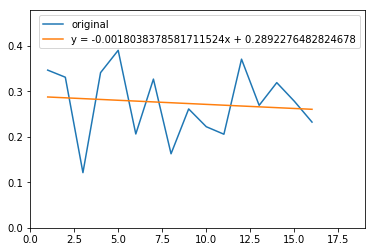

33


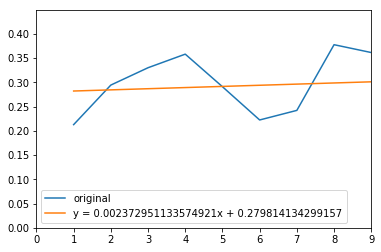

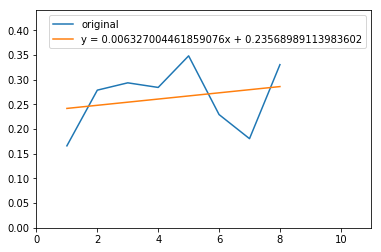

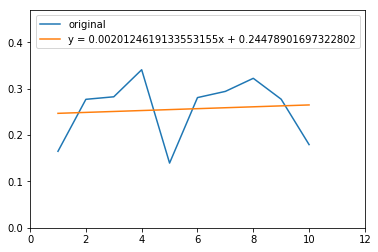

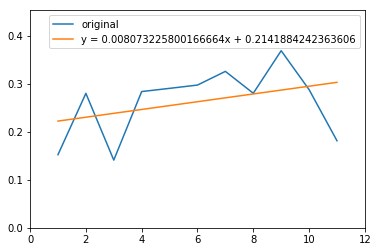

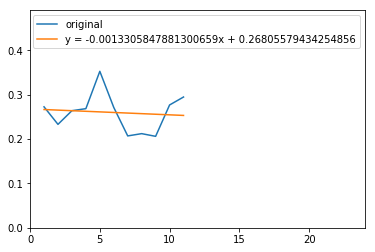

34


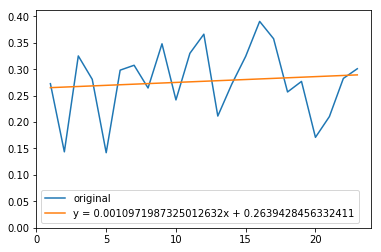

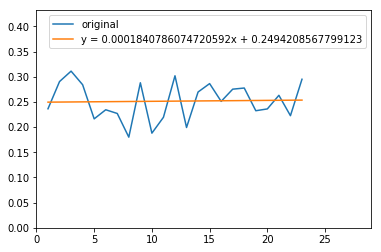

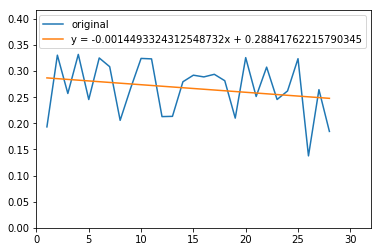

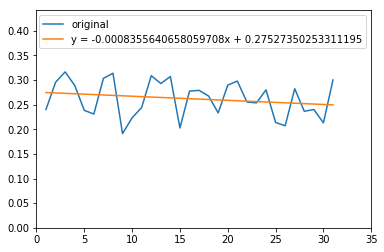

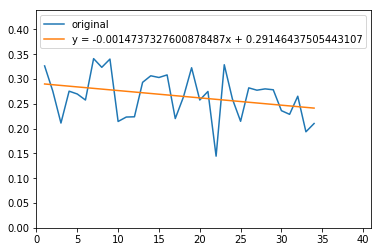

36


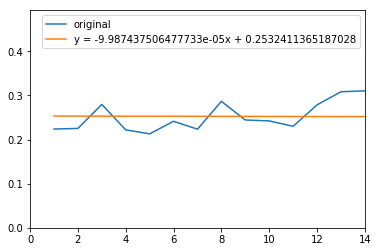

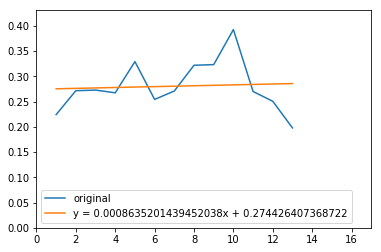

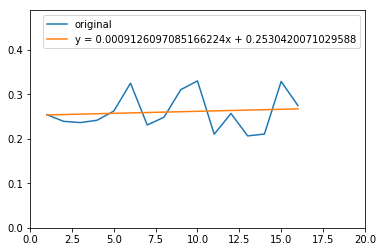

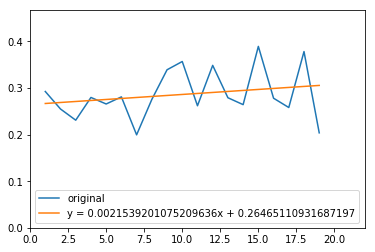

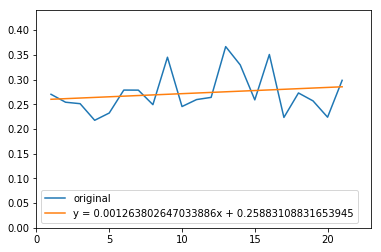

38


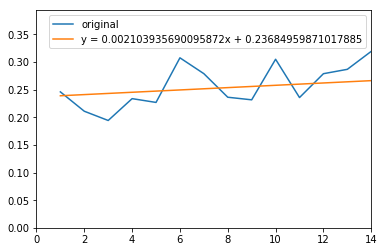

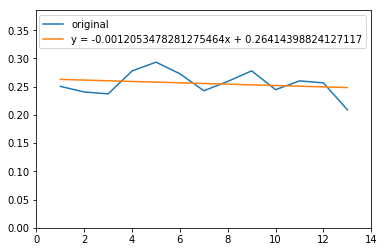

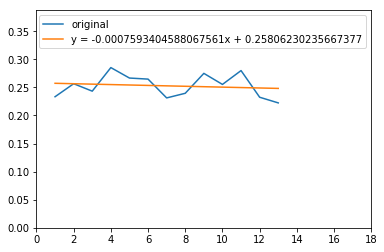

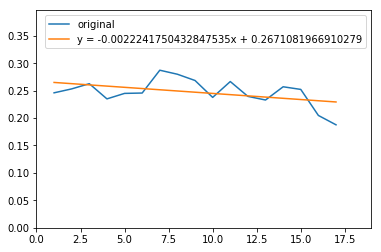

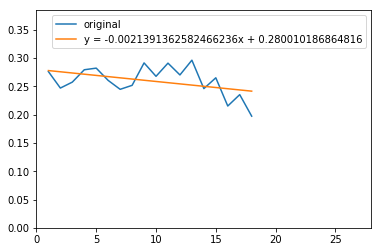

39


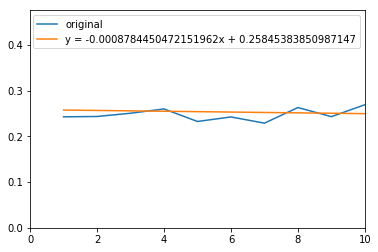

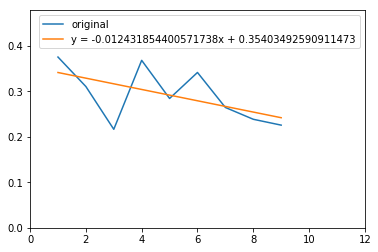

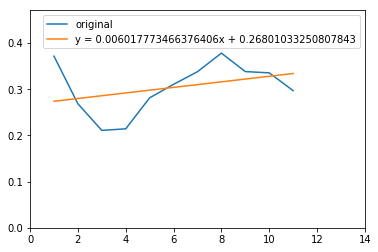

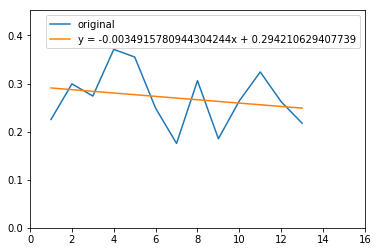

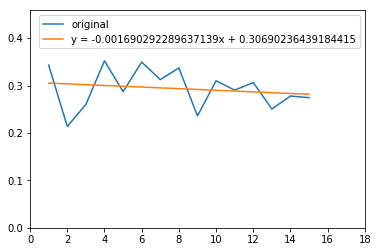

40


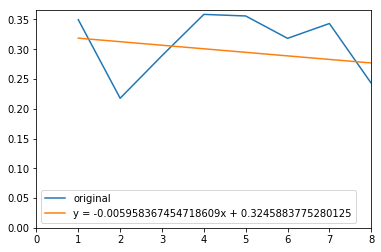

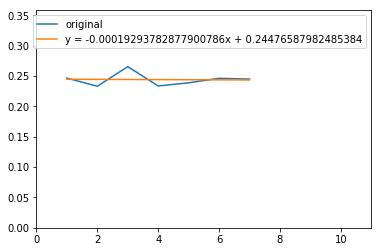

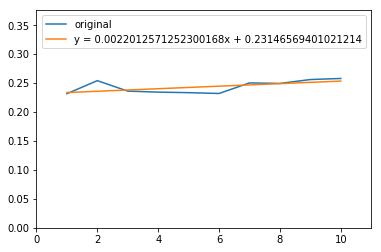

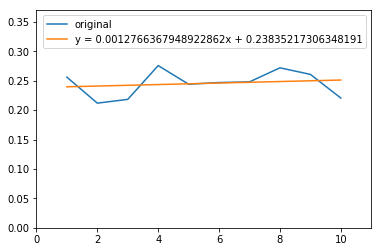

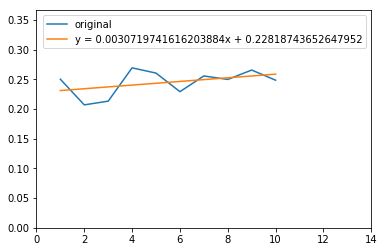

41


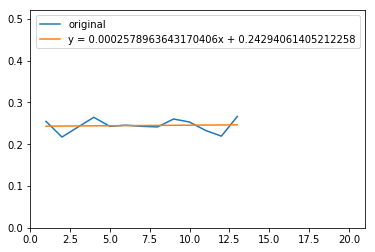

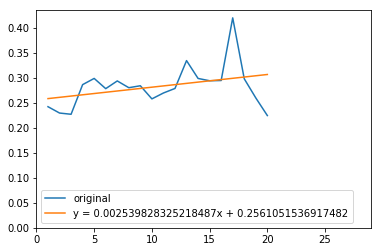

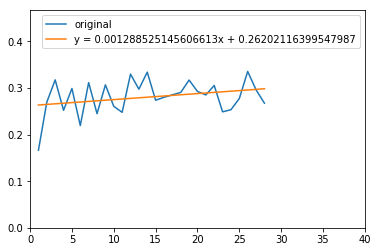

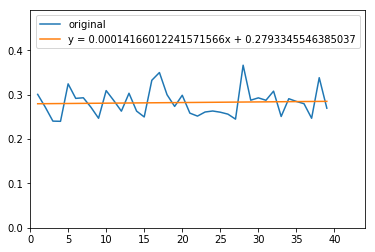

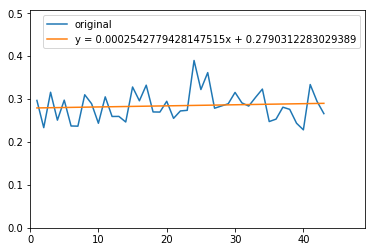

42


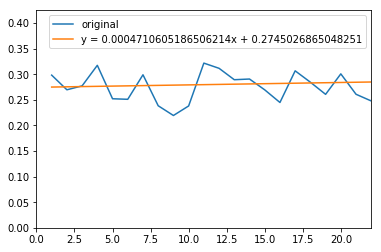

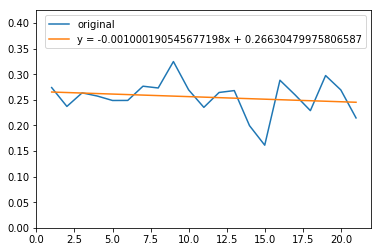

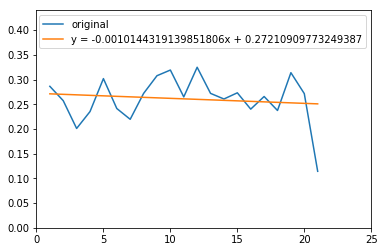

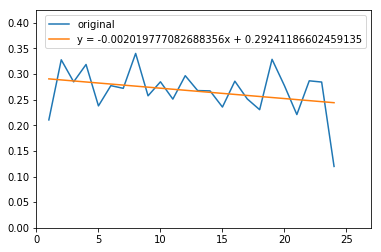

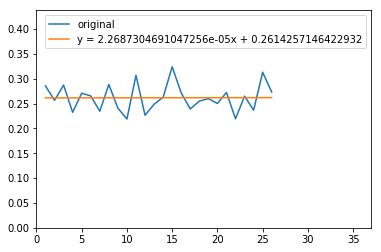

43


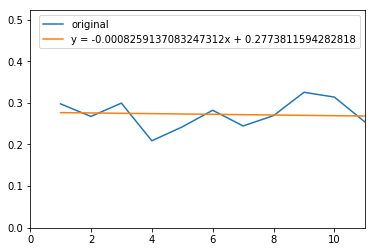

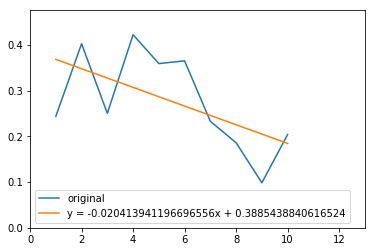

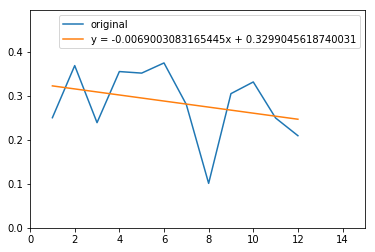

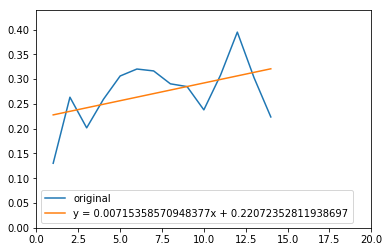

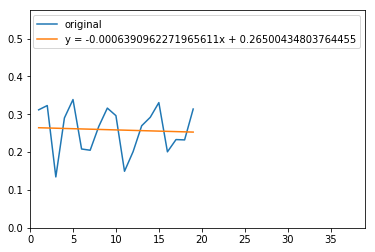

44


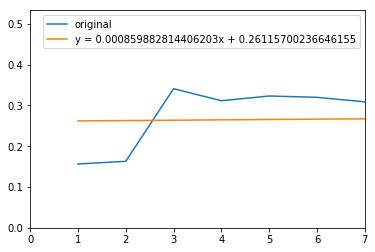

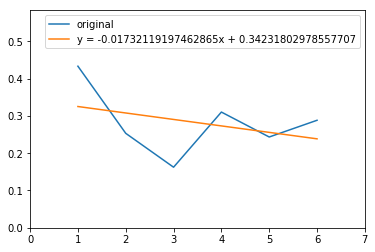

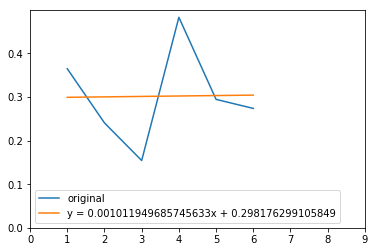

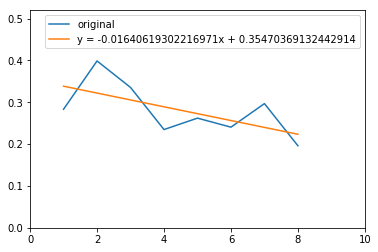

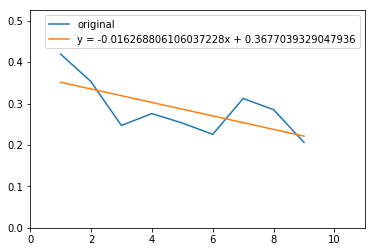

47


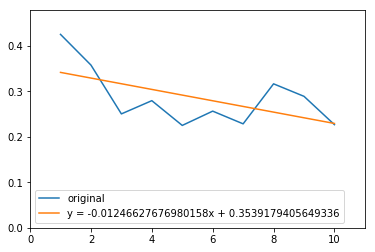

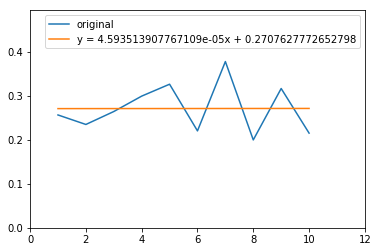

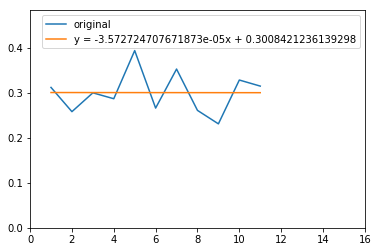

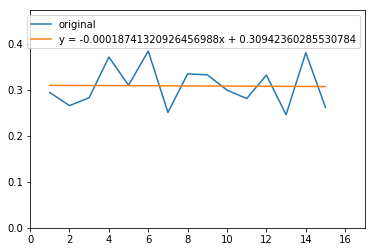

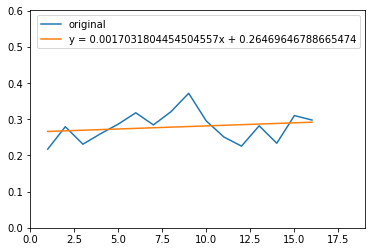

48


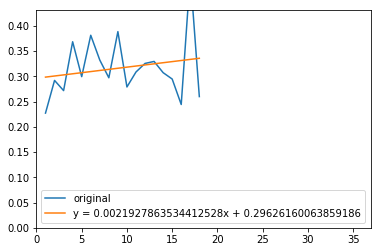

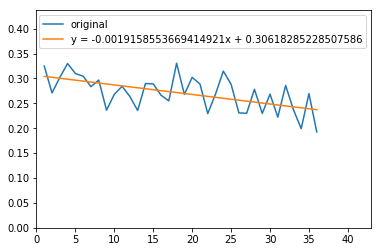

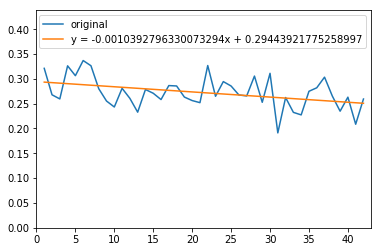

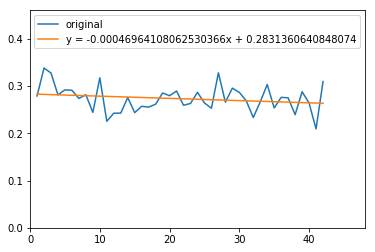

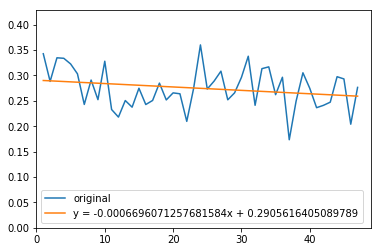

49


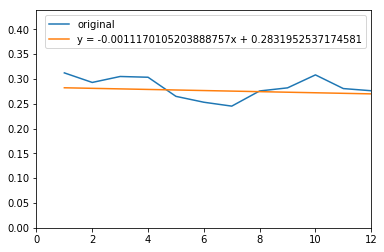

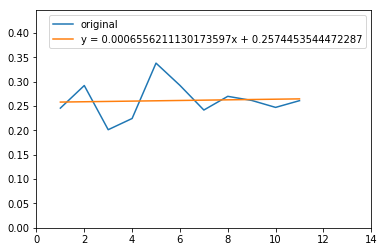

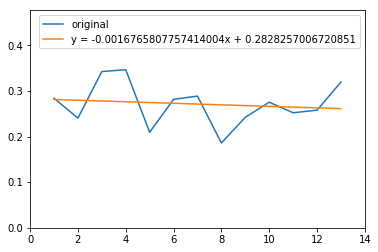

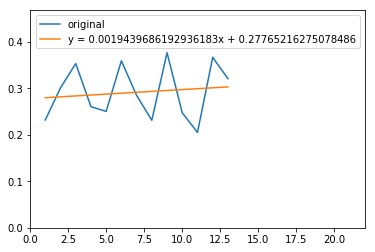

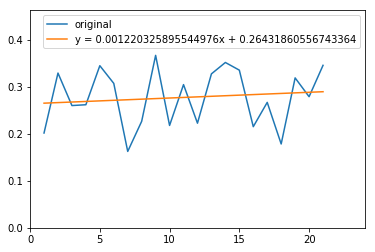

50


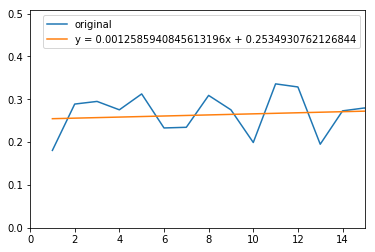

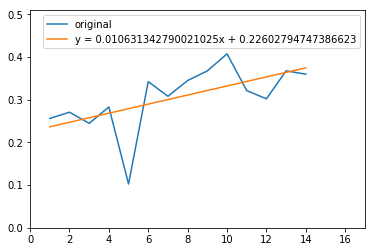

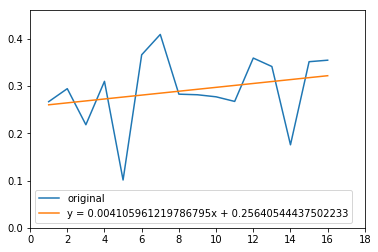

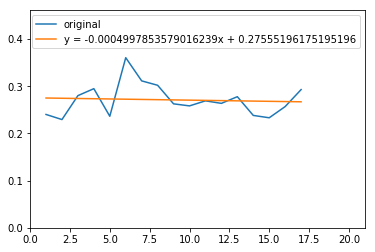

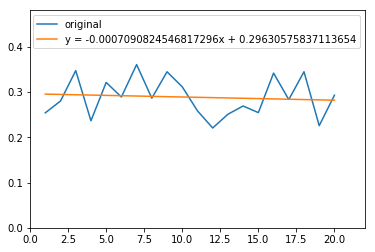

55


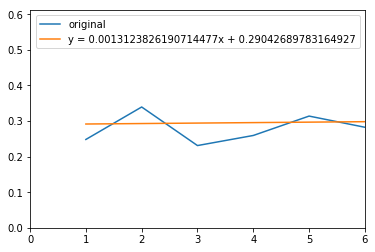

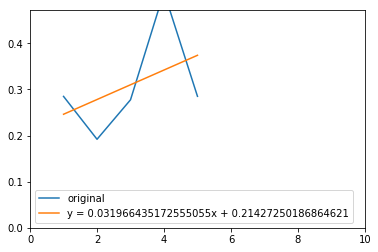

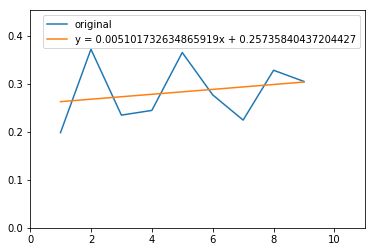

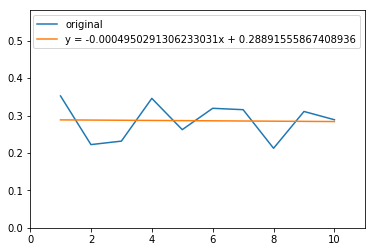

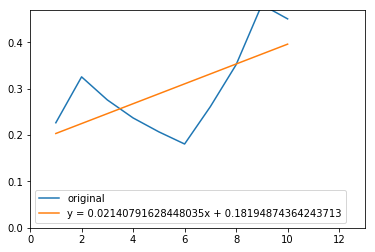

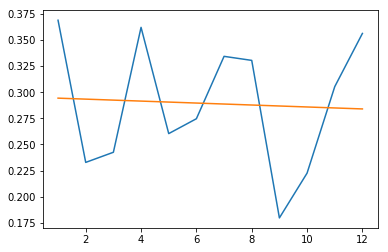

In [3]:
%matplotlib inline
for u in users:
    print(u)
    user_ratings = ratings[ratings.userId == u].sort_values('timestamp')
    user_ratings = user_ratings.set_index('movieId')
    user_ratings['average'] = movie_average.rating
    # 获取用户所看电影的类别频次
    count = overalltrend.genres_count(u)
    # 获取用户所看类型电影的平均分
    genres_average = overalltrend.genres_average(u)
    # 获取用户观看前5的类别
    category = sorted(count, key=lambda x: count[x])
    if len(category) >= 5:
        category = category[-5:]
    for k in category:
        movie_type = overalltrend.get_type(k)
        average = genres_average[k]
        user_rating = user_ratings[user_ratings.index.isin(movie_type)]
        user_rating['interest_%s' % k] = (user_rating.rating / user_rating.average) / average
        interest = user_rating['interest_%s' % k].values
        maxValue = max(interest)
        x = np.arange(1, len(interest) + 1, 1)
        y = interest
        # 最小二乘法拟合曲线
        z = np.polyfit(x, y, 1)
        # 斜率>0,则上升趋势，<0则为下降趋势
        slope = z[0]
        # 作图
        p = np.poly1d(z)
        plt.xlim((0, len(interest) + 1))
        plt.ylim((0, maxValue + 0.1))
        plt.legend()
        plt.show()
        plt.plot(x, y, label='original')
        plt.plot(x, p(x), label=f'y = {z[0]}x + {z[1]}')
    if u > 50:
        break